
## Exploratory Data Analysis

The project involves exploratory data analysis with the pets.db database. This is a database with 4 tables. One called pets is list of pets that were adopted in the Seattle area. The other three contain income tax return information for zip codes in Washington state. Each of them has the same format, a row for each zip code and columns for different income brackets. They are num_returns for number of tax returns, num_professional for number of professionally prepared tax returns and num_dependents for number of dependents claimed. See the Preparing Pet Dataset notebook on the share for details on how pets.db was created from csv files and for some example queries and joins.

Produce the following tables and figures:

- Top 5 Dog and Cat Names with Counts

- Top 10 Dog Breeds with Counts

- Bar Chart of Species Counts

- Based on totals over all zip codes with over 1000 adoptions create a clustered bar chart with clusters that are income brackets and within each cluster there are three bars: total returns, total professionally prepared, total dependents. This will help us see how these three are related.

Calculate the following values for each zip code that has more than 1000 adoptions: Adoptions/Total Returns, Total Dependents/Total Returns, Total Professionally Prepared/Total Returns, Percentage of Returns 50k and Below, Percentage of Returns 100k and Above. In order to investigate whether there are relationships between number of dependents, professional tax preparation and wealth with pet adoptions create the following plots:

- Scatter plot of Adoptions/Total Returns vs Total Dependents/Total Returns

- Scatter plot of Adoptions/Total Returns vs Total Professionally Prepared/Total Returns

- Scatter plot of Adoptions/Total Returns vs Percentage of Returns under 50k

- Scatter plot of Adoptions/Total Returns vs Percentage of Returns over 100k

After each plot include your observations based on the plot. Do factors seem correlated or unrelated? Do the results match your expectations? 

Last, add one plot of your choice based on what you think might be interesting.

Extra Credit:

Separate out dog and cat adoptions and find zip code totals. Then repeat the above scatter plots with Dog Adoptions/Total Returns and Cat Adoptions/ Total Returns and see if there are any differences in any of the plots (total eight plots).

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
connection = sqlite3.connect('file:/share/Datasets/pets.db?mode=rwc', uri=True)

## 1

In [39]:
query= "SELECT animal_s_name as 'AnimalName', COUNT(pet_id) AS 'Count' FROM pets WHERE species='Dog'"
query += " GROUP BY animal_s_name ORDER BY Count DESC;"
pd.read_sql_query(query, connection).head(5)

,AnimalName,Count
0,Lucy,412
1,Charlie,346
2,Bella,335
3,Daisy,256
4,Buddy,255


### The above table shows the top 5 dog names with counts in descending order. 

## 2

In [40]:
query= "SELECT animal_s_name as 'AnimalName', COUNT(pet_id) AS 'Count' FROM pets WHERE species='Cat'"
query += " GROUP BY animal_s_name ORDER BY Count DESC;"
pd.read_sql_query(query, connection).head(5)

,AnimalName,Count
0,Lucy,147
1,Max,120
2,Luna,119
3,Bella,112
4,Oliver,108


### The above table shows the top 5 dog names with counts in descending order. 

## 3

In [41]:
query= "SELECT primary_breed as 'Breed', COUNT(pet_id) AS 'Count' FROM pets WHERE species= 'Dog'"
query += " GROUP BY Breed ORDER BY Count DESC;"
pd.read_sql_query(query, connection).head(10)

,Breed,Count
0,"Retriever, Labrador",6291
1,"Retriever, Golden",2305
2,"Chihuahua, Short Coat",2092
3,German Shepherd,1245
4,Australian Shepherd,1169
5,Terrier,1096
6,Border Collie,972
7,"Terrier, American Pit Bull",951
8,"Poodle, Miniature",919
9,Shih Tzu,818


### The above table shows the top 10 dog breeds with counts in descending order.

## 4

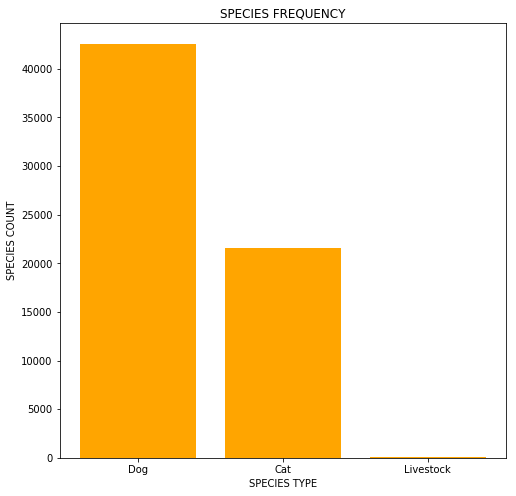

In [42]:
query= "SELECT species as 'Species', COUNT(pet_id) AS 'Count' FROM pets"
query += " GROUP BY Species ORDER BY Count DESC;"
bardata = pd.read_sql_query(query, connection)

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(bardata.Species, bardata.Count, align='center', color = 'orange')
ax.set_ylabel('SPECIES COUNT')
ax.set_xlabel('SPECIES TYPE')
plt.title('SPECIES FREQUENCY')
 
plt.show()

### The above figure is a bar chart of Species counts.

In [43]:
#MASKING FOR OVER 1000 ADOPTIONS

query = "SELECT *,COUNT(pet_id) FROM pets GROUP BY zip_code HAVING COUNT(pet_id)>1000 ORDER BY COUNT(pet_id) DESC"
result = pd.read_sql_query(query, connection, index_col="zip_code")

In [44]:
#DOING A PANDA JOIN WITH RETURNS DATA
returns = pd.read_sql_query("SELECT * FROM num_returns;", connection, index_col='zip_code')
joinedreturns = result.join(returns)
joinedreturns.head()

,pet_id,animal_s_name,primary_breed,species,COUNT(pet_id),below_25k,btw_25k_50k,btw_50k_75k,btw_75k_100k,btw_100k_200k,above_200k
zip_code,,,,,,,,,,,
98115,20,Shelby,"Retriever, Labrador",Dog,5823,5740,4970,3590,2540,5850,3800
98103,3,Pepper,Manx,Cat,5492,5970,6940,4760,3130,5610,3040
98117,2,Ginger,"Retriever, Golden",Dog,4910,3520,3370,2460,1890,4420,2280
98125,14,Hunter,Devon Rex,Cat,3721,6100,5520,3160,1950,3370,1110
98107,1,Jack,"Schnauzer, Miniature",Dog,3056,2910,3760,2800,1860,3260,1320


In [45]:
#DOING A PANDA JOIN WITH PROFESSIONAL DATA
professional = pd.read_sql_query("SELECT * FROM num_professional;", connection, index_col='zip_code')
joinedprofessional = result.join(professional)

In [46]:
#DOING A PANDA JOIN WITH DEPENDENTS DATA
dependents = pd.read_sql_query("SELECT * FROM num_dependents;", connection, index_col='zip_code')
joineddependents = result.join(dependents)

In [47]:
#Across column
returns_tot = joinedreturns.iloc[:,5:].sum()

In [48]:
#Across column
professional_tot = joinedprofessional.iloc[:,5:].sum()

In [49]:
#Across column
dependents_tot = joineddependents.iloc[:,5:].sum()

## 5

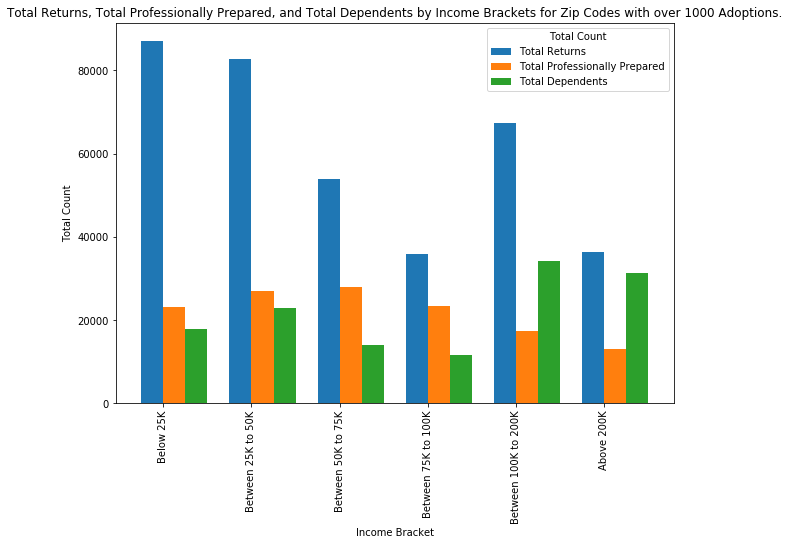

In [50]:
lp_fig, lp_ax = plt.subplots(figsize=(10,7))
N = 6
ind = np.arange(6)  
width= 0.25

p1 = plt.bar(ind, returns_tot[0:6], width)
p2 = plt.bar(ind+width, professional_tot[0:6], width, bottom = 0)
p3 = plt.bar(ind+(width*2), dependents_tot[0:6], width, bottom = 0)

plt.xlabel('Income Bracket')
plt.ylabel('Total Count')
plt.title('Total Returns, Total Professionally Prepared, and Total Dependents by Income Brackets for Zip Codes with over 1000 Adoptions.')
plt.xticks(ind, ('Below 25K', 'Between 25K to 50K', 'Between 50K to 75K', 'Between 75K to 100K', 'Between 100K to 200K','Above 200K'), rotation = 90)
lp_ax.set_xticks(ind + width / 2)
lp_ax.legend((p1[0], p2[0], p3[0]), ( 'Total Returns', 'Total Professionally Prepared', 'Total Dependents'),loc = 'upper right', title ='Total Count')

plt.show()

### Based on totals over all zip codes with over 1000 adoptions here is a clustered bar chart with clusters that are income brackets and within each cluster there are three bars: total returns, total professionally prepared, total dependents.

### Now,

In [51]:
# Adoptions (same as Count(pet_id)) / Total Returns
a = joinedreturns.iloc[:,4]/joinedreturns.iloc[:,5:].sum(axis=1)

In [52]:
# Total Dependents / Total Returns
b = joineddependents.iloc[:,5:].sum(axis=1)/joinedreturns.iloc[:,5:].sum(axis=1)

In [53]:
# Total Professionally Prepared / Total Returns
c = joinedprofessional.iloc[:,5:].sum(axis=1)/joinedreturns.iloc[:,5:].sum(axis=1)

## 6
### Scatter plot of Adoptions/Total Returns vs Total Dependents/Total Returns for Zip Codes with over 1000 Adoptions

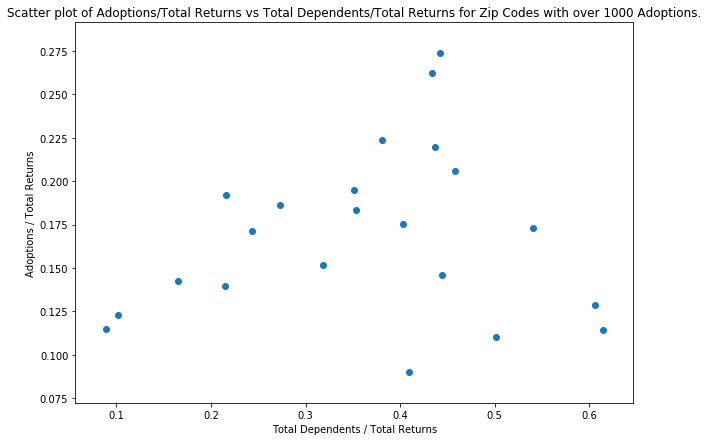

In [54]:
sp_fig, sp_ax = plt.subplots(figsize=(10,7))


plt.xlabel('Total Dependents / Total Returns')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Total Dependents/Total Returns for Zip Codes with over 1000 Adoptions.')
plt.scatter(b,a)

plt.show()

### The factors Adoptions/Total Returns and Total Dependents/Total Returns seem to be unrelated. The results definitely match my expectations because it is hard to find a direct concrete connection between total number of adoptions and total number of dependents claimed.

## 7
### Scatter plot of Adoptions/Total Returns vs Total Professionally Prepared/Total Returns for Zip Codes with over 1000 Adoptions

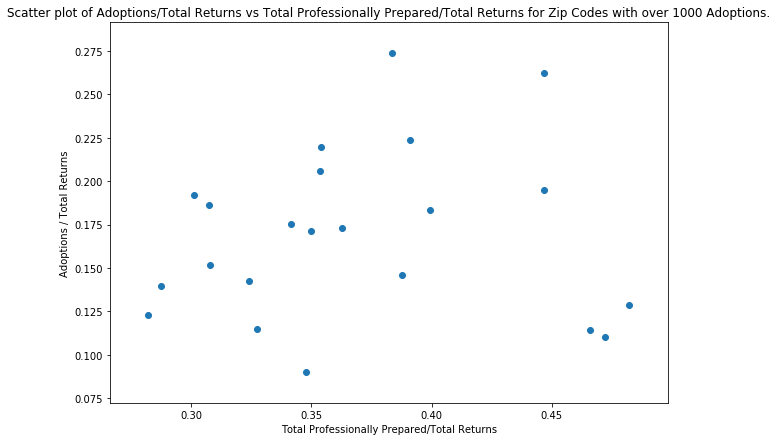

In [55]:
sp_fig, sp_ax = plt.subplots(figsize=(10,7))


plt.xlabel('Total Professionally Prepared/Total Returns')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Total Professionally Prepared/Total Returns for Zip Codes with over 1000 Adoptions.')
plt.scatter(c,a)

plt.show()

### The factors Adoptions/Total Returns and Total Professionally Prepared/Total Returns seem to be unrelated. Again, the results definitely match my expectations because it is hard to find a direct concrete connection between total number of adoptions and total number of professionally prepared tax returns.

In [56]:
#for percentage of returns under 50K
d = (joinedreturns.iloc[:,5:6].sum(axis=1)/joinedreturns.iloc[:,5:].sum(axis=1))*100

In [57]:
#for percentage of returns over 100K
e = (joinedreturns.iloc[:,9:].sum(axis=1)/joinedreturns.iloc[:,5:].sum(axis=1))*100

## 8
### Scatter plot of Adoptions/Total Returns vs Percentage of Returns under 50k

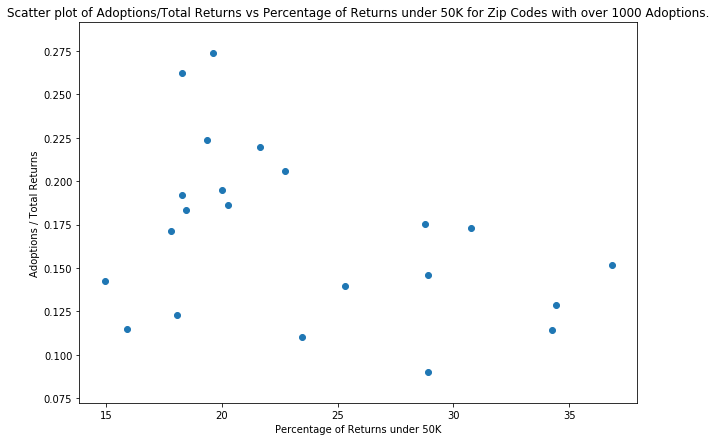

In [58]:
sp_fig, sp_ax = plt.subplots(figsize=(10,7))


plt.xlabel('Percentage of Returns under 50K')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Percentage of Returns under 50K for Zip Codes with over 1000 Adoptions.')
plt.scatter(d,a)

plt.show()

### The factors Adoptions/Total Returns and Percentage of Returns under 50K show low negative correlation.

## 9
### Scatter plot of Adoptions/Total Returns vs Percentage of Returns over 100k

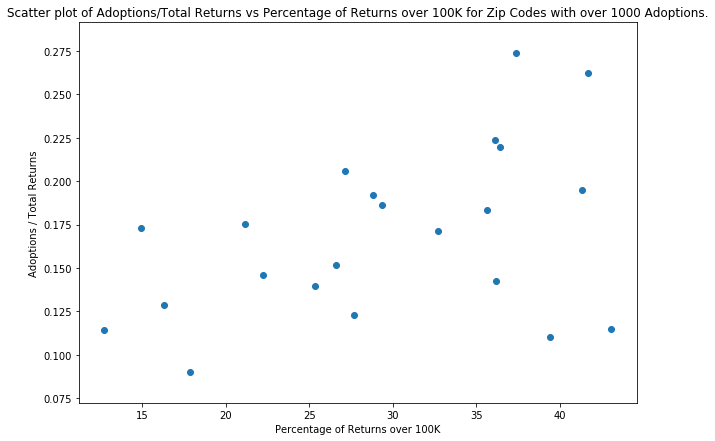

In [59]:
sp_fig, sp_ax = plt.subplots(figsize=(10,7))


plt.xlabel('Percentage of Returns over 100K')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Percentage of Returns over 100K for Zip Codes with over 1000 Adoptions.')
plt.scatter(e,a)

plt.show()

### The factors Adoptions/Total Returns and Percentage of Returns over 100K show low positive correlation.

## 10
## Plot of Choice: Correlation between Total Adoptions Count and Total Returns through Regression

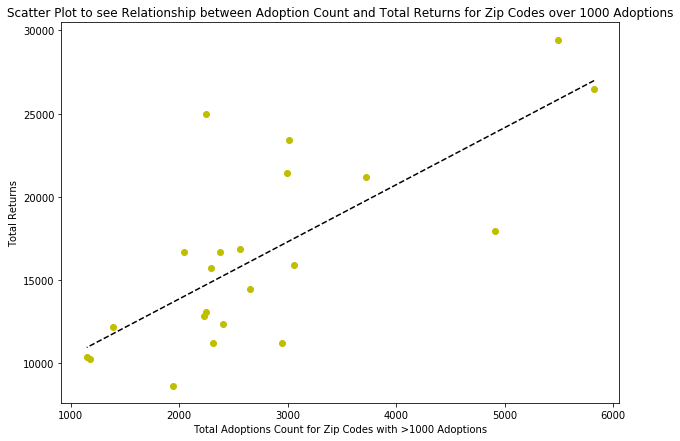

In [60]:
totaladoptions = joinedreturns.iloc[:,4]
totalreturns = joinedreturns.iloc[:,5:].sum(axis=1)

fit = np.polyfit(totaladoptions,totalreturns,1)
fit_fn = np.poly1d(fit) 

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(totaladoptions,totalreturns, 'yo', totaladoptions, fit_fn(totaladoptions), '--k')
#plt.scatter(totaladoptions, totalreturns, color = 'red', label = "Adoptions/Total Returns vs Total Dependents/Total Returns")
plt.ylabel('Total Returns')
plt.xlabel ('Total Adoptions Count for Zip Codes with >1000 Adoptions')
           
plt.title('Scatter Plot to see Relationship between Adoption Count and Total Returns for Zip Codes over 1000 Adoptions')
plt.show()

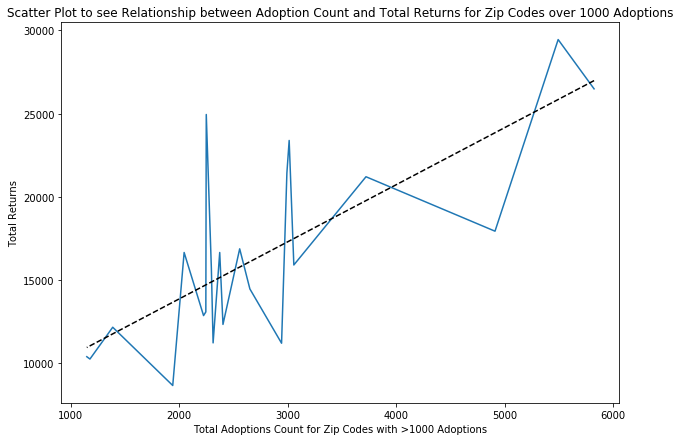

In [61]:
totaladoptions = joinedreturns.iloc[:,4]
totalreturns = joinedreturns.iloc[:,5:].sum(axis=1)

fit = np.polyfit(totaladoptions,totalreturns,1)
fit_fn = np.poly1d(fit) 

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(totaladoptions,totalreturns, totaladoptions, fit_fn(totaladoptions), '--k')
#plt.scatter(totaladoptions, totalreturns, color = 'red', label = "Adoptions/Total Returns vs Total Dependents/Total Returns")
plt.ylabel('Total Returns')
plt.xlabel ('Total Adoptions Count for Zip Codes with >1000 Adoptions')
           
plt.title('Scatter Plot to see Relationship between Adoption Count and Total Returns for Zip Codes over 1000 Adoptions')
plt.show()

### STRONG POSITIVE CORRELATION

# EXTRA CREDIT:

## DOG ADOPTIONS

In [62]:
query= "SELECT *, COUNT(pet_id) FROM pets WHERE species='Dog'"
query += " GROUP BY zip_code HAVING COUNT(pet_id)>100 ORDER BY COUNT(pet_id) DESC;"
count1 = pd.read_sql_query(query, connection, index_col="zip_code")

In [63]:
#DOING A PANDA JOIN OF OUR NEW DATAFRAME OF ONLY DOGS >100 WITH THE RETURNS, PROFESSIONAL AND DEPENDENTS DATAFRAMES
join_dog_returns = count1.join(returns)
join_dog_professional = count1.join(professional)
join_dog_dependents = count1.join(dependents)

In [64]:
# Adoptions (same as Count(pet_id)) / Total Returns FOR DOGS DATA >100
adog = join_dog_returns.iloc[:,4]/join_dog_returns.iloc[:,5:].sum(axis=1)

In [65]:
# Total Dependents / Total Returns FOR DOGS DATA >100
bdog = join_dog_dependents.iloc[:,5:].sum(axis=1)/join_dog_returns.iloc[:,5:].sum(axis=1)

In [66]:
# Total Professionally Prepared / Total Returns FOR DOGS DATA >100
cdog = join_dog_professional.iloc[:,5:].sum(axis=1)/join_dog_returns.iloc[:,5:].sum(axis=1)

In [67]:
#for percentage of returns under 50K FOR DOGS DATA >100
ddog = (join_dog_returns.iloc[:,5:6].sum(axis=1)/join_dog_returns.iloc[:,5:].sum(axis=1))*100

In [68]:
#for percentage of returns over 100K FOR DOGS DATA >100
edog = (join_dog_returns.iloc[:,9:10].sum(axis=1)/join_dog_returns.iloc[:,5:].sum(axis=1))*100

## DOG. 1. 

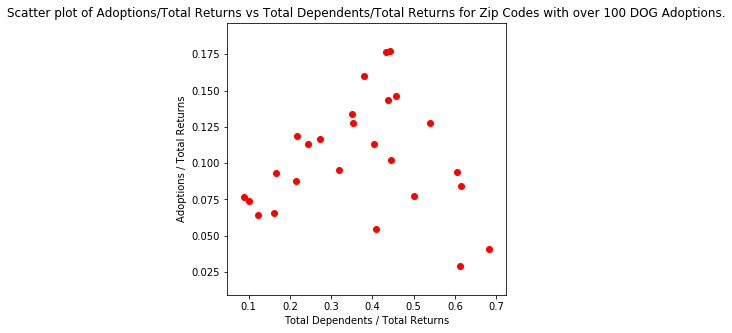

In [84]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Total Dependents / Total Returns')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Total Dependents/Total Returns for Zip Codes with over 100 DOG Adoptions.')
plt.scatter(bdog,adog, color = 'red')

plt.show()

### No Correlation.

## DOG. 2. 

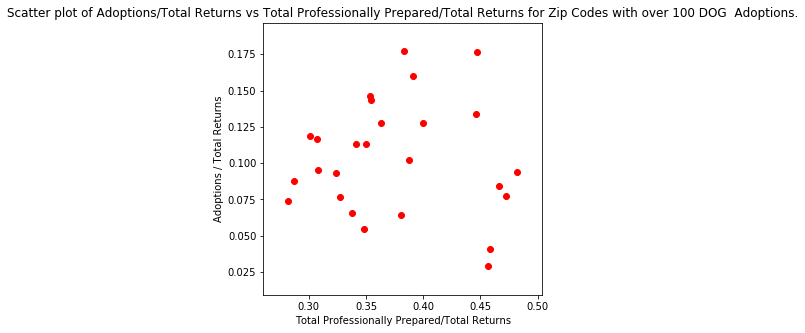

In [85]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Total Professionally Prepared/Total Returns')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Total Professionally Prepared/Total Returns for Zip Codes with over 100 DOG  Adoptions.')
plt.scatter(cdog,adog, color = 'red')

plt.show()

### No Correlation.

## DOG. 3. 

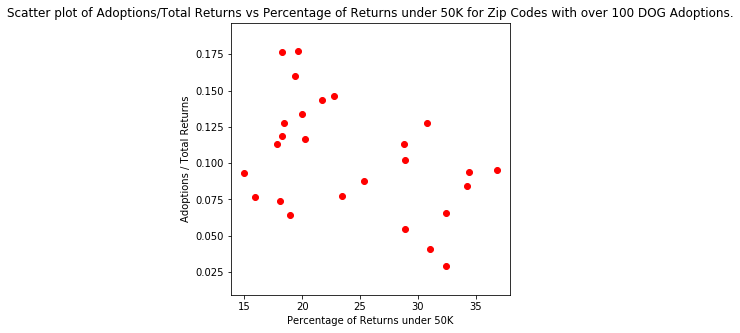

In [86]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Percentage of Returns under 50K')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Percentage of Returns under 50K for Zip Codes with over 100 DOG Adoptions.')
plt.scatter(ddog,adog, color = 'red')

plt.show()

### Low Negative Correlation.

## DOG. 4. 

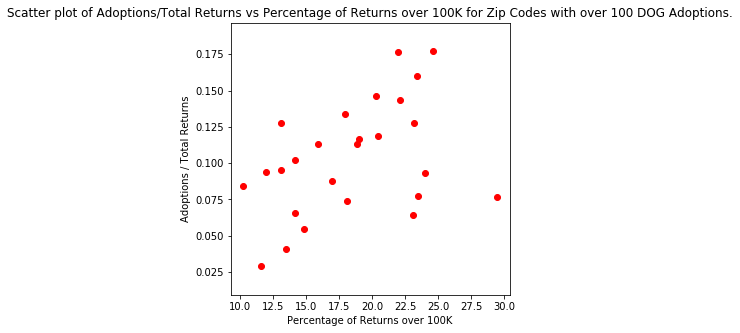

In [87]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Percentage of Returns over 100K')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Percentage of Returns over 100K for Zip Codes with over 100 DOG Adoptions.')
plt.scatter(edog,adog, color = 'red')

plt.show()

### Low Positive Correlation.

## CAT ADOPTIONS

In [73]:
query= "SELECT *, COUNT(pet_id) FROM pets WHERE species='Cat'"
query += " GROUP BY zip_code HAVING COUNT(pet_id)>100 ORDER BY COUNT(pet_id) DESC;"
count2 = pd.read_sql_query(query, connection, index_col="zip_code")

In [74]:
#DOING A PANDA JOIN OF OUR NEW DATAFRAME OF ONLY CATS >100 WITH THE RETURNS, PROFESSIONAL AND DEPENDENTS DATAFRAMES
join_cat_returns = count2.join(returns)
join_cat_professional = count2.join(professional)
join_cat_dependents = count2.join(dependents)

In [75]:
# Adoptions (same as Count(pet_id)) / Total Returns FOR CATS DATA >100
acat = join_cat_returns.iloc[:,4]/join_cat_returns.iloc[:,5:].sum(axis=1)

In [76]:
# Total Dependents / Total Returns FOR CATS DATA >100
bcat = join_cat_dependents.iloc[:,5:].sum(axis=1)/join_cat_returns.iloc[:,5:].sum(axis=1)

In [77]:
# Total Professionally Prepared / Total Returns FOR CATS DATA >100
ccat = join_cat_professional.iloc[:,5:].sum(axis=1)/join_cat_returns.iloc[:,5:].sum(axis=1)

In [78]:
#for percentage of returns under 50K FOR CATS DATA >100
dcat = (join_cat_returns.iloc[:,5:6].sum(axis=1)/join_cat_returns.iloc[:,5:].sum(axis=1))*100

In [79]:
#for percentage of returns over 100K FOR CATS DATA >100
ecat = (join_cat_returns.iloc[:,9:10].sum(axis=1)/join_cat_returns.iloc[:,5:].sum(axis=1))*100

## CAT. 1. 

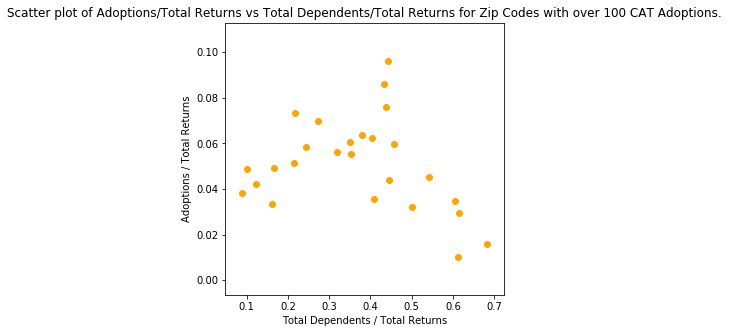

In [88]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Total Dependents / Total Returns')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Total Dependents/Total Returns for Zip Codes with over 100 CAT Adoptions.')
plt.scatter(bcat,acat, color = 'orange')

plt.show()

### No Correlation.

## CAT. 2. 

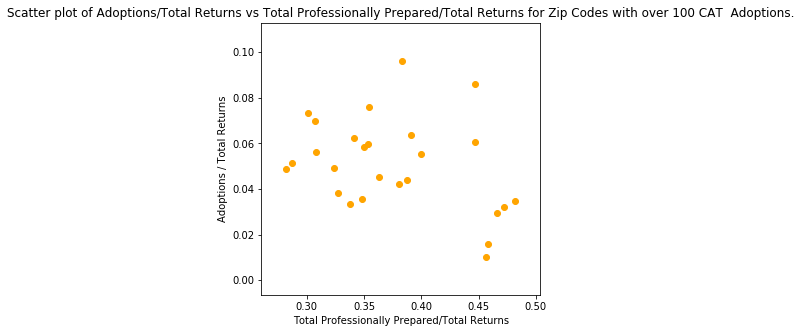

In [89]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Total Professionally Prepared/Total Returns')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Total Professionally Prepared/Total Returns for Zip Codes with over 100 CAT  Adoptions.')
plt.scatter(ccat,acat, color = 'orange')

plt.show()

### No Correlation.

## CAT. 3. 

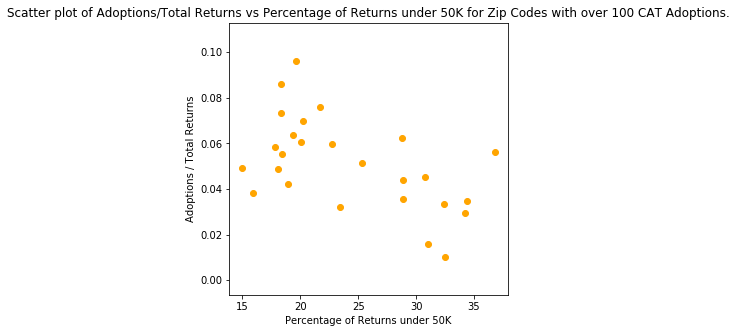

In [90]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Percentage of Returns under 50K')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Percentage of Returns under 50K for Zip Codes with over 100 CAT Adoptions.')
plt.scatter(dcat,acat, color = 'orange')

plt.show()

### Low Negative Correlation. 

## CAT. 4. 

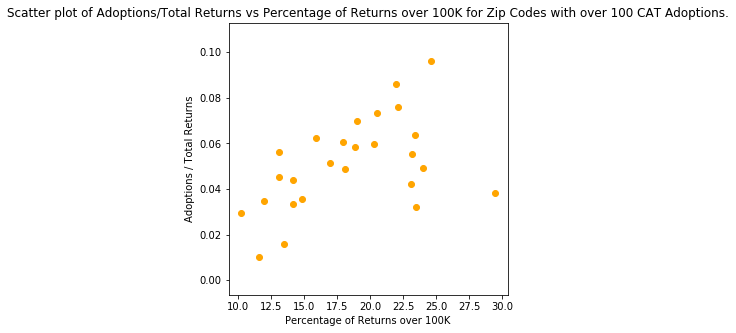

In [91]:
sp_fig, sp_ax = plt.subplots(figsize=(5,5))


plt.xlabel('Percentage of Returns over 100K')
plt.ylabel('Adoptions / Total Returns')
plt.title('Scatter plot of Adoptions/Total Returns vs Percentage of Returns over 100K for Zip Codes with over 100 CAT Adoptions.')
plt.scatter(ecat,acat, color = 'orange')

plt.show()

### Low Positive Correlation.